In [13]:
library(dplyr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [14]:
# Read the file We open our file in Jupyter Notebook that has R installed in it. We use the dplyr package. dplyr is a new package which provides a set of tools for efficiently manipulating datasets in R. We use provide the command read.csv and we import our data set into Jupyter notebook. 

data <- read.csv("C:/Users/Anu/Downloads/PA1/PA1/healthcare_stroke_dataset.csv")

In [15]:
#return the first 5 rows of the dataset
head(data)

id,date,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
9046,12/30/2020,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,8/18/2020,Female,61,0,0,Yes,Self-employed,Rural,202.21,NA,never smoked,1
31112,3/5/2020,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,7/8/2020,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,6/5/2020,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
56669,6/1/2020,Male,81,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [16]:
stroke = subset(data, select = -c(id))

In [17]:
colSums(is.na(stroke)) # bmi is having mising values

date            gender               age      hypertension 
                0                 0                 0                 0 
    heart_disease      ever_married         work_type    Residence_type 
                0                 0                 0                 0 
avg_glucose_level               bmi    smoking_status            stroke 
                0               201                 0                 0

In [18]:
stroke$bmi[is.na(stroke$bmi)] <- round(median(stroke$bmi, na.rm = TRUE)) # bmi missing values to median

In [19]:
stroke$age <- round(stroke$age)  # rounding the  age values 

In [20]:
colSums(is.na(stroke))

date            gender               age      hypertension 
                0                 0                 0                 0 
    heart_disease      ever_married         work_type    Residence_type 
                0                 0                 0                 0 
avg_glucose_level               bmi    smoking_status            stroke 
                0                 0                 0                 0

In [21]:
#1-a Print the details of dataframe
print(stroke)

           date gender age hypertension heart_disease ever_married
1    12/30/2020   Male  67            0             1          Yes
2     8/18/2020 Female  61            0             0          Yes
3      3/5/2020   Male  80            0             1          Yes
4      7/8/2020 Female  49            0             0          Yes
5      6/5/2020 Female  79            1             0          Yes
6      6/1/2020   Male  81            0             0          Yes
7     7/31/2020   Male  74            1             1          Yes
8     1/12/2020 Female  69            0             0           No
9     5/31/2020 Female  59            0             0          Yes
10    6/22/2020 Female  78            0             0          Yes
11     5/3/2020 Female  81            1             0          Yes
12    12/5/2020 Female  61            0             1          Yes
13   12/22/2020 Female  54            0             0          Yes
14   11/16/2020   Male  78            0             1         

In [22]:
#1-b Find the number of rows and columns in dataset
print(is.data.frame(stroke))
print(ncol(data))
print(nrow(data))
#There are totally 13 columns and 5110 rows. 

[1] TRUE
[1] 13
[1] 5110


In [23]:
#1-c Print descriptive detail of a column in dataset
summary(stroke['avg_glucose_level'])
#The descriptive detail of the dataset contains, the min, median, mode, max and 1st and 3rd quartile values. 

 avg_glucose_level
 Min.   : 55.12   
 1st Qu.: 77.25   
 Median : 91.89   
 Mean   :106.15   
 3rd Qu.:114.09   
 Max.   :271.74   

In [24]:
#1-d Find all the count of unique values for a 'avg_glucose_level' column in dataset
unique(stroke$avg_glucose_level)
#We find the unique values by using unique() along with the dataset and column name to it.

[1] 228.69 202.21 105.92 171.23 174.12 186.21  70.09  94.39  76.15  58.57
  [11]  80.43 120.46 104.51 219.84 214.09 167.41 191.61 221.29  89.22 217.08
  [21] 193.94 233.29 228.70 208.30 102.87 104.12 100.98 189.84 195.23 211.78
  [31] 212.08  83.41 196.92 252.72  84.20  84.03 219.72  74.63  92.62  60.91
  [41]  78.03  71.22 144.90  90.90 213.03 243.58 109.78 107.26  99.33  58.09
  [51]  89.96  75.32 127.29 124.13 197.54 196.71  59.32 237.75 194.99 180.93
  [61] 185.17  74.90  61.94  93.72 104.72 113.01 221.58 104.47  86.23  72.67
  [71]  62.57 179.12 116.55 228.56  96.59  66.72 240.09 110.85 165.31 143.43
  [81]  96.16 101.45  88.92  79.79  71.20  96.97 111.81  59.35  86.94  98.55
  [91] 226.98  72.81  68.02  68.56  64.14 235.63  76.34 240.59  78.92  82.81
 [101]  74.10 190.32 231.61  78.70 110.52  82.30  73.18 191.82  93.05  64.17
 [111] 129.98  68.53 106.41 224.10  82.10 216.94  76.11  72.96  82.28 105.22
 [121]  59.86  62.55 259.63 249.31 219.91 131.41  93.13  73.54 200.59  62.48
 [131] 190.14 130.54 182.99 206.09 263.32 140.10 207.28 194.37 199.20 103.68
 [141] 116.44  70.28  72.17 221.79 151.16  68.43  67.29  67.41 239.07 169.67
 [151] 223.83  76.57  77.82  92.98 231.56 102.16 221.89 195.71  74.02  57.92
 [161]  81.76  70.37 203.87  89.13 133.19 162.23  75.02  98.02  91.54 111.98
 [171]  60.94  97.43  91.02  60.67 185.49  64.44  56.11 110.66 213.22  78.18
 [181] 111.04  76.13  81.32 112.24 137.30 116.69 215.94  86.62 209.86 205.77
 [191] 112.16 118.03 271.74  97.92 200.62 242.52  93.81 114.77  74.96 167.13
 [201] 175.29  90.00 109.47  87.85 106.74  80.13  90.19 134.80 106.58  83.24
 [211] 103.43 208.65  74.11  95.84 205.33 116.10 210.40 199.86 219.73 250.89
 [221]  72.73 205.35  70.30 104.86 216.58 184.40  60.98  97.76  66.03  81.95
 [231]  97.73  70.94 199.84 218.46 211.06  86.30 162.14  88.20  91.92  76.46
 [241] 197.28 233.94 247.51  84.96  57.93  78.80  87.80  78.81  95.12  87.96
 [251] 110.89  69.04 161.28 210.95  77.59 243.53  77.67 205.84  77.08  57.08
 [261] 162.96  73.50  95.04  85.37  84.62  82.67  57.33  67.84  75.70 129.54
 [271]  60.22 198.21 109.82  60.84  94.61  97.49 206.72 214.45  82.90 103.26
 [281]  55.78  73.74 149.75  82.34  62.60  94.09  55.42  82.18 117.92 114.84
 [291]  79.17 110.63 190.70  79.81 113.63 141.24  56.96 203.04  94.30  81.51
 [301] 137.74  81.84 242.30 102.64 146.01  75.42 220.49  61.45  88.19 115.22
 [311]  97.93  85.60  79.83  62.20  69.15 127.71 216.70  71.89 103.56  79.03
 [321]  69.94  90.12  95.10 234.58 235.85  78.05  89.44 111.38 243.50 182.20
 [331] 229.92  82.24  89.84  90.69  84.38 215.60  91.61 138.16  75.23  75.18
 [341] 106.23 239.64  58.95  99.92 116.23 118.82  66.30 101.41 200.28 136.80
 [351]  96.57  66.42  98.09 205.23  86.78 126.82  78.40  63.69 209.58  89.86
 [361] 110.99  83.82 137.96 210.78 118.89  72.55 107.41  93.25  74.91  80.05
 [371]  99.80  91.97  64.40  73.02  88.11 138.29  72.36  68.76 106.22 101.52
 [381] 109.51  85.84 110.15  91.72 251.60 123.10  97.40  68.34  80.81 120.31
 [391]  83.51  74.09  91.60  87.52 213.37  75.39 122.41 223.36  84.59  70.16
 [401] 107.52  80.88  93.48  70.21  86.67 101.37  70.31  64.06 178.29  81.60
 [411] 147.48  86.86  71.16  73.20 203.81  82.00  97.55  94.29  75.22  90.07
 [421]  73.73  79.58  77.88 205.26  58.63 139.90 211.03  72.79  91.65  79.92
 [431] 225.47  94.48 180.63  92.48 116.66 112.09 130.34  82.59 123.87  98.70
 [441] 227.10  55.39  66.07 104.21 145.15  68.19  97.53 122.31  86.46 112.06
 [451]  92.14 201.76  74.44  95.93  87.51  72.35 113.47 103.78 115.43  95.59
 [461] 170.05 217.30 196.01  92.21 100.09  93.88  75.05  70.08  74.20  69.01
 [471]  96.17 184.15  87.24 198.69  82.58  96.88  73.32  94.59 132.08  98.99
 [481] 104.48  98.01  79.14  89.32  65.24  80.98 186.17  69.24 111.19  93.28
 [491] 122.19 129.53 114.53  93.73  77.49  65.38  94.18 118.70  96.29  74.64
 [501]  96.99 100.61  97.08  84.79  78.75  82.93  88.78 122.10  74.81 183.45
 [511] 114.94 104.38 102.91 108.79  73.31  68.52  89.77  70.92  86.11 129.16

In [25]:
#1-d Find all percentage of 'Residence_type' for all the values
as.data.frame(table(stroke$Residence_type))


Var1,Freq
Rural,2514
Urban,2596


In [26]:
count(stroke)

n
5110


In [27]:
Rural_Percentage<-(2514/5110)*100
Urban_Percentage<-(2596/5110)*100
str(Rural_Percentage)
str(Urban_Percentage)
#We got the percentage of residence type as 2514 for rural and 2596 for urban. 

 num 49.2
 num 50.8


In [28]:
#Task 2-a: Find out the gender with largest number of records 
as.data.frame(table(stroke$gender))
#We can get the gender with the largest number of records by fetching the values. We have gotten the output in a table format and from that we can infer that the gender with largest number of records which is Female with ‘2994’ records. 

Var1,Freq
Female,2994
Male,2115
Other,1


In [29]:
#Task 2-b: Find out the total number of Residence_type "Urban" who are Male
res_urban <- stroke %>% filter(Residence_type =='Urban')

In [30]:
res_urban

date,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
12/30/2020,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
7/8/2020,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
6/1/2020,Male,81,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
1/12/2020,Female,69,0,0,No,Private,Urban,94.39,22.8,never smoked,1
6/22/2020,Female,78,0,0,Yes,Private,Urban,58.57,24.2,-,1
12/22/2020,Female,54,0,0,Yes,Private,Urban,104.51,27.3,smokes,1
11/16/2020,Male,78,0,1,Yes,Private,Urban,219.84,28.0,-,1
10/12/2020,Female,79,0,1,Yes,Private,Urban,214.09,28.2,never smoked,1
8/12/2020,Male,64,0,1,Yes,Private,Urban,191.61,37.5,smokes,1
12/7/2020,Male,75,1,0,Yes,Private,Urban,221.29,25.8,smokes,1


In [31]:
as.data.frame(table(res_urban$gender))

Var1,Freq
Female,1529
Male,1067
Other,0


In [32]:
count(res_urban %>% filter(gender == 'Male'))
#We use filter and filter residence type by urban values and then we obtain the count for gender=male as asked in the question. We get number of residence type =” Urban”. Who are male as 1067. 
 


n
1067


In [33]:
# Group by function for dataframe in R using pipe operator 
#2-c 1 question #Find the top 10 ages with highest av_glucose_level
library(dplyr)
#find rows that contain max points by team and position
val_top_age=stroke %>%
  group_by(age) %>%
  slice(which.max(avg_glucose_level))

In [34]:
res=tail(val_top_age, n=10)

In [35]:
res[,c("age","avg_glucose_level")] 
#We have obtained the top 10 ages with highest avg_glucose_levlel by grouping the dataset by age and we obtain the max value and find the top 10 values by using tail to get the top 10 ages.

age,avg_glucose_level
73,231.43
74,251.99
75,243.53
76,267.61
77,250.80
78,243.73
79,253.86
80,259.63
81,250.89
82,253.16


In [36]:
#2-d 2nd question top 10 ages with more number of strokes

library(dplyr)
#find rows that contain max points by team and position
val_top=stroke %>%
  group_by(age) %>%
  slice(which.max(stroke))

In [37]:
res1=tail(val_top, n=10)

In [38]:
res1[,c("age","stroke")] 
#We have obtained the top 10 ages with a greater number of strokes by grouping the dataset by age and we obtain the max value and find the top 10 values by using tail to get the top 10 ages.



age,stroke
73,1
74,1
75,1
76,1
77,1
78,1
79,1
80,1
81,1
82,1


In [39]:
##TASK 3: VISUALIZATION

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


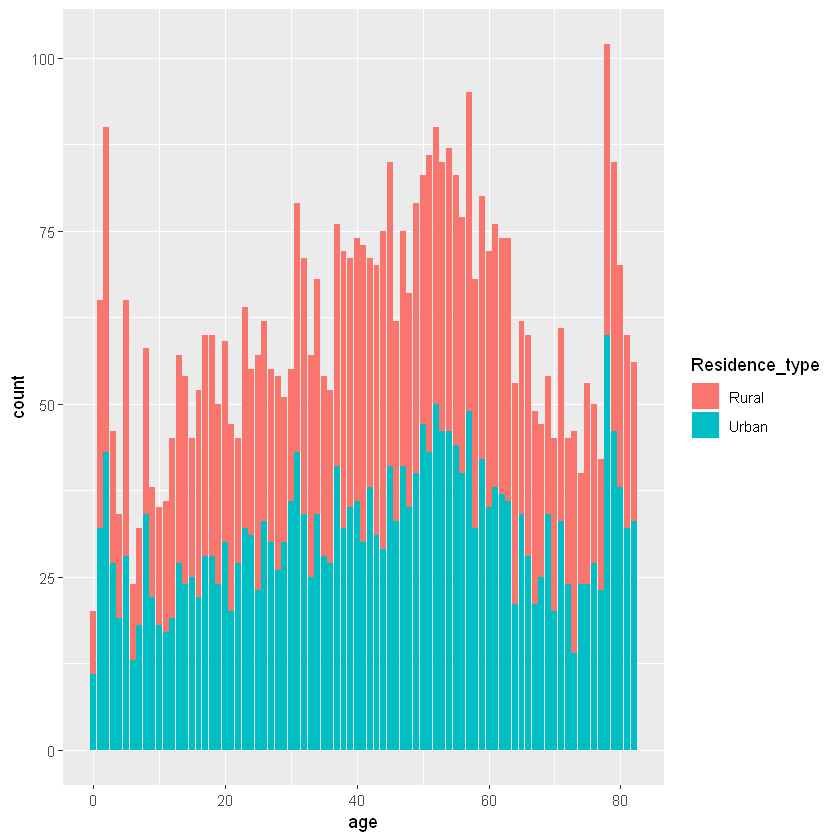

In [40]:
#task 3-a
#Create barplot showing gender with count with residence type
library(ggplot2)
ggplot(stroke, 
       aes(x = age, 
           fill = Residence_type)) + 
  geom_bar(position = "stack")
    #The below output shows the barplot created. For thus we have used the library ggplot2 and we have plotted the graph. 


   never smoked               - formerly smoked          smokes 
           1892            1544             885             789 

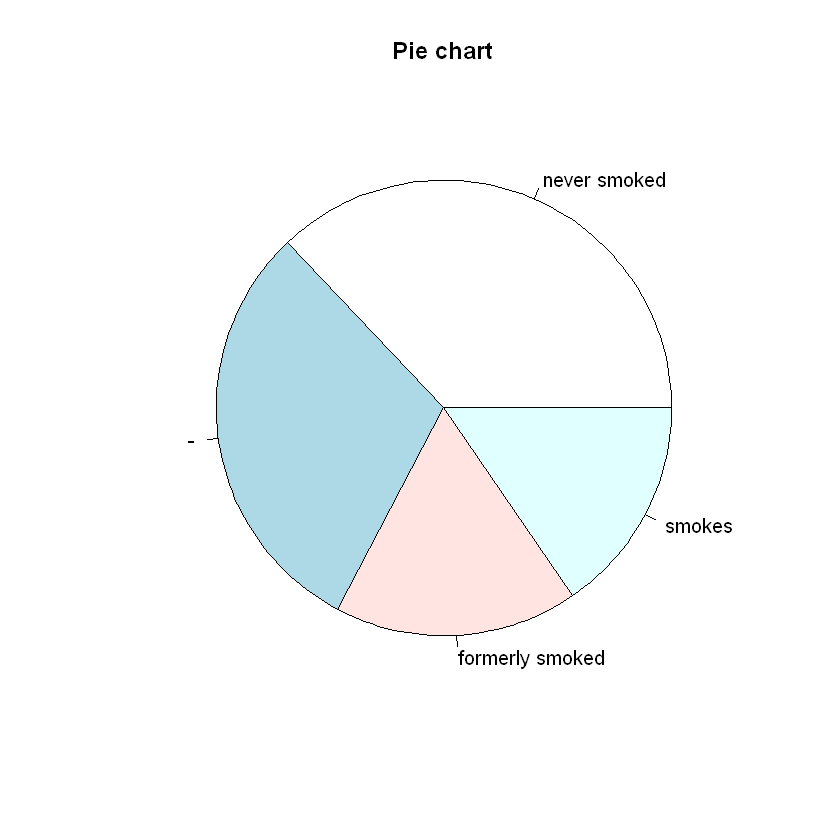

In [41]:
#task 3-b
#Display pie chart for the smoking status data
tbl <- sort(table(stroke$smoking_status),
            decreasing = T)
tbl
# Create the pie chart and give it a title
pie(tbl)
title("Pie chart")
#The pie chart shows the smoking status data that contains 4 different values. Never smoked- 1892, formerly smoked-789, smokes-885 and no value- 1544

In [42]:
#Task4 finding an interesting pattern
# atleast two visualization with explanation

In [46]:
library(gridExtra)
p1 <- ggplot(data = stroke) +geom_bar(mapping = aes(x = gender))
p3 <-ggplot(data = stroke) +geom_bar(mapping = aes(x = heart_disease)) 
p4 <-ggplot(data = stroke) +geom_bar(mapping = aes(x = smoking_status)) 



Attaching package: 'gridExtra'

The following object is masked from 'package:dplyr':

    combine



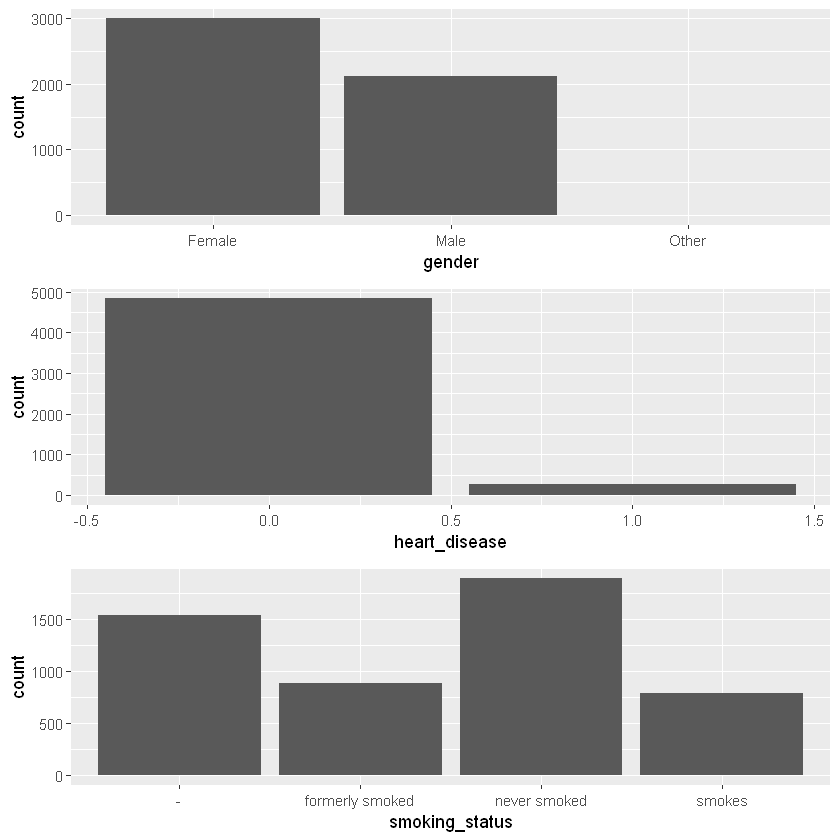

In [47]:
grid.arrange(p1,p3,p4)
#this is univariant analysis where we can find about individual attributes and their counts
#By this we can analysis something from the data 

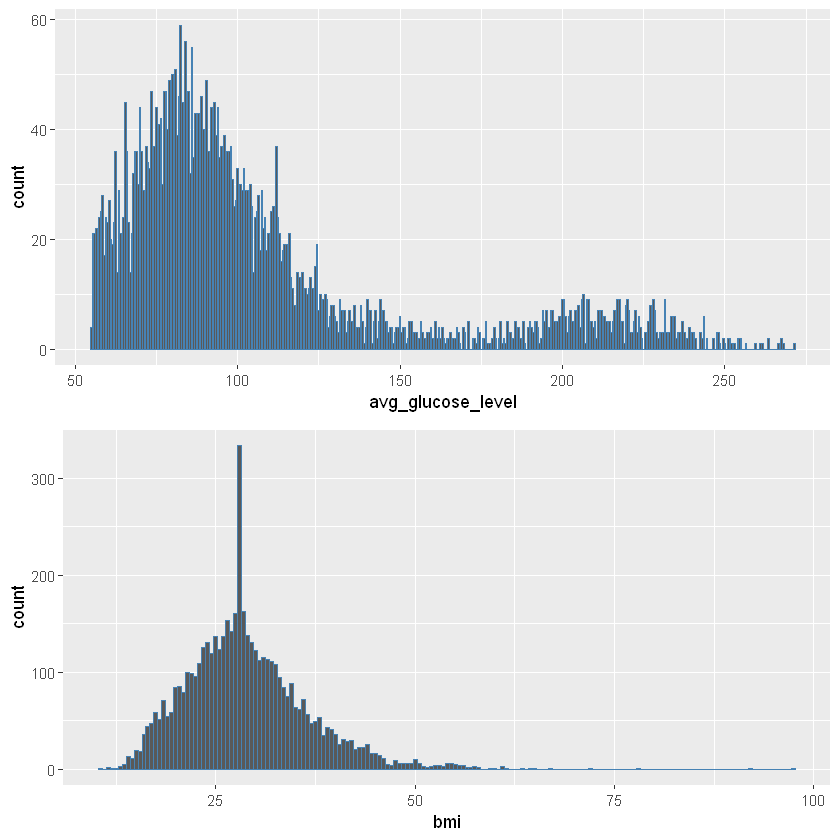

In [48]:
c1 <- ggplot(data = stroke) + geom_histogram(mapping = aes(x = avg_glucose_level), binwidth = 0.5, col = 'steelblue')
c2 <- ggplot(data = stroke) + geom_histogram(mapping = aes(x = bmi), binwidth = 0.5, col = 'steelblue')
grid.arrange(c1,c2)
# analysis for continuous variables 

In [ ]:
# analysis for continuous variables 